<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/CNNs/3_ImageClassificationCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification on CIFAR-10 (Simple CNN)**

🎯 **Goal:** The main goal of this application is to build a model that classifies images from give images

🗄️ **Dataset:** [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class

**I. Import Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

**II. Prepare Data**

In [2]:
# Get the dataset
dataset = datasets.cifar10
# Separate train and test samples
(xTrain, yTrain), (xTest, yTest) = dataset.load_data()
# Pre-processing: normalizing data
xTrain, xTest = xTrain / 255.0, xTest / 255.0
# Now, check the outputs
print('Train data shape:', xTrain.shape)
print('Test data shape:', xTest.shape)
print('Train labels shape:', yTrain.shape)
print('Test labels shape:', yTest.shape)

170508288/170498071 [==============================] - 11s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test labels shape: (10000, 1)


**III. Check Some of Data Instances**

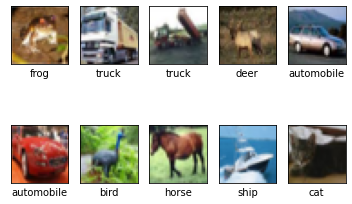

In [3]:
# What classes do we need?
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck']

for index in range(len(classes)):
  plt.subplot(2, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTrain[index])
  plt.xlabel(classes[yTrain[index][0]])
plt.show()

**IV. Create the Model**

In [4]:
# Model
model = models.Sequential()
# output filters (activation maps): 32, filter size: 3*3, stride: 1, no padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10))
model.summary()

# Output interpretation:
# - 32*32*3 becomes 30*30 (because of no padding), and 32 activation maps
# - 30*30*32 is fed to MaxPooling with size 2*2 and makes 15*15*2
# - NO. params: 3*3*3 for each Conv * 32 filters + 32 biases = 896
#               + 7200 * 10 = 72000 + 10 bias = 72010 + 896 = 72906

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________


**V. Training and Evaluation**

In [5]:
# For each sample, we have a vector of logits
predictions = model(xTrain[:1]).numpy()
predictions

# Now, converting these values into probabilities using SoftMax
tf.nn.softmax(predictions).numpy()

array([[0.07247274, 0.08072717, 0.10735706, 0.09812324, 0.08731695,
        0.0956089 , 0.12331582, 0.13472581, 0.07441193, 0.12594034]],
      dtype=float32)

In [6]:
# Loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss(yTrain[:1], predictions).numpy()
# The loss function is going to show negative probability, it would be close to 2.4 (tf.math.log(1/10))

2.0930066

In [10]:
# Adam optimizer
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
# Start training
history = model.fit(xTrain, yTrain, epochs=10, validation_data=(xTest, yTest))

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8123 - accuracy: 0.7206 - val_loss: 1.0935 - val_accuracy: 0.6300
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7912 - accuracy: 0.7253 - val_loss: 1.1089 - val_accuracy: 0.6343
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7715 - accuracy: 0.7335 - val_loss: 1.1253 - val_accuracy: 0.6269
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7542 - accuracy: 0.7390 - val_loss: 1.0899 - val_accuracy: 0.6310
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7370 - accuracy: 0.7459 - val_loss: 1.1100 - val_accuracy: 0.6277
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7218 - accuracy: 0.7516 - val_loss: 1.1417 - val_accuracy: 0.6238
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7020 - accuracy: 0.7578 - val_loss: 1.1221 -

In [11]:
# Accuracy on the testing data (the previous cell was for trainig data validation)
testLoss, testAcc = model.evaluate(xTest, yTest, verbose=2)
print('Accuracy:', testAcc)

313/313 - 2s - loss: 1.1483 - accuracy: 0.6294 - 2s/epoch - 5ms/step
Accuracy: 0.6294000148773193


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower weight'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


313/313 - 2s - loss: 1.1483 - accuracy: 0.6294 - 2s/epoch - 6ms/step


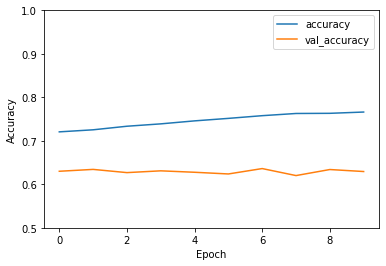

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend(loc='lower weight')

testLoss, testAcc = model.evaluate(xTest, yTest, verbose=2)

**VI. Prediction**

In [13]:
# Make some predictions
# Returning probability by wrapping the model in a softmax layer
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probabilityModel.predict(xTest[:10]) # Testing the first 10 images
prediction[0]

array([6.9010210e-05, 1.1425088e-05, 1.3083960e-03, 9.1536927e-01,
       5.4605084e-04, 8.1046345e-03, 5.9199845e-03, 9.2907503e-05,
       6.8241842e-02, 3.3651068e-04], dtype=float32)

In [16]:
# Applying a lablel and compare with the test label
print('Predicted labels:', np.argmax(prediction, axis=1))
print('Original labels:', yTest[:10].flatten())

Predicted labels: [3 8 0 8 6 6 1 6 3 1]
Original labels: [3 8 8 0 6 6 1 6 3 1]


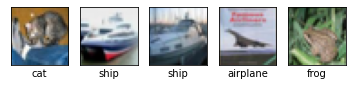

In [17]:
# Plot the first five images
for index in range(5):
  plt.subplot(1, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTest[index])
  plt.xlabel(classes[yTest[index][0]])
plt.show()

(3, 3, 3, 32)


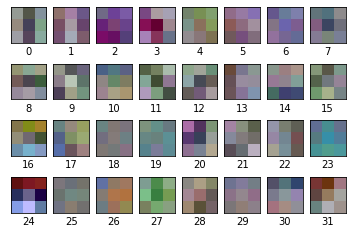

In [21]:
# What are the learned parameters
filters, biases = model.layers[0].get_weights() # layer1 weights
filterMin, filterMax = filters.min(), filters.max()
filters = (filters - filterMin) / (filterMax - filterMin)
print(filters.shape)

# Plot the 10 filters
numberOfFilters = 32
for index in range(numberOfFilters):
  filter = filters[:, :, :, index]
  plt.subplot(4, 8, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(index)
  plt.imshow(filter)
plt.show()

# We can see learned filters in the first Conv network